## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("data/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [8]:
### Check all the categories 
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["TypeofContact"] = df["TypeofContact"].fillna(df["TypeofContact"].mode()[0])
df["DurationOfPitch"] = df["DurationOfPitch"].fillna(df["DurationOfPitch"].median())
df["NumberOfFollowups"] = df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0])
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0])
df["NumberOfTrips"] = df["NumberOfTrips"].fillna(df["NumberOfTrips"].median())
df["NumberOfChildrenVisiting"] = df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0])
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())


In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering

### Feature Extraction

In [15]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [17]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [18]:
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True)

In [19]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [20]:
df.dtypes

ProdTaken                   int64
Age                       float64
TypeofContact                 str
CityTier                    int64
DurationOfPitch           float64
Occupation                    str
Gender                        str
NumberOfFollowups         float64
ProductPitched                str
PreferredPropertyStar     float64
MaritalStatus                 str
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                   str
MonthlyIncome             float64
TotalVisiting             float64
dtype: object

In [21]:
num_features = df.select_dtypes(include="number").columns.tolist()
print("Num of Numerical Features:", len(num_features))

Num of Numerical Features: 12


In [22]:
print(num_features)

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [23]:
cat_features = df.select_dtypes(include=["object", "string", "category"]).columns.tolist()
print("Num of Categorical Features:", len(cat_features))

Num of Categorical Features: 6


In [24]:
print(cat_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [25]:
binary_features = [col for col in num_features if df[col].nunique(dropna=True) == 2]
print("Num of Binary Numerical Features:", len(binary_features))


Num of Binary Numerical Features: 3


In [26]:
print(binary_features)

['ProdTaken', 'Passport', 'OwnCar']


In [27]:
discrete_features = [
    col for col in num_features
    if df[col].nunique(dropna=True) <= 25
    and col not in binary_features
    and df[col].dtype.kind in "iu"   # integer types only
]
print("Num of Discrete Features:", len(discrete_features))



Num of Discrete Features: 2


In [28]:
print(discrete_features)

['CityTier', 'PitchSatisfactionScore']


In [29]:
continuous_features = [
    col for col in num_features
    if col not in discrete_features + binary_features
]
print("Num of Continuous Features:", len(continuous_features))

Num of Continuous Features: 7


In [30]:
print(continuous_features)

['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'MonthlyIncome', 'TotalVisiting']


In [31]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Train Test Split And Model Training

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [33]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [34]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [35]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = X_train.select_dtypes(include=["object", "string", "category"]).columns
num_features = X_train.select_dtypes(include=["number"]).columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")  # keep as you wrote (good)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", oh_transformer, cat_features),
        ("num", numeric_transformer, num_features),
    ],
    remainder="drop"
)

cat_features, num_features


(Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='str'),
 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
        'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
        'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
       dtype='str'))

In [37]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [38]:

X_train_tr = preprocessor.fit_transform(X_train)
X_test_tr  = preprocessor.transform(X_test)

X_train_tr.shape, X_test_tr.shape


((3910, 26), (978, 26))

In [39]:
print("Original X_train shape:", X_train.shape)
print("Transformed X_train shape:", X_train_tr.shape)

print("Original X_test shape:", X_test.shape)
print("Transformed X_test shape:", X_test_tr.shape)


Original X_train shape: (3910, 17)
Transformed X_train shape: (3910, 26)
Original X_test shape: (978, 17)
Transformed X_test shape: (978, 26)


## Random Forest Classifier Training

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score
)


In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42)
}


In [42]:
for name, model in models.items():
    model.fit(X_train_tr, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_tr)
    y_test_pred  = model.predict(X_test_tr)

    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train_tr)[:, 1]
        y_test_proba  = model.predict_proba(X_test_tr)[:, 1]
        model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)
        model_test_rocauc_score  = roc_auc_score(y_test, y_test_proba)
    else:
        model_train_rocauc_score = None
        model_test_rocauc_score = None

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)

    print(name)

    print("Model performance for Training set")
    print(f"- Accuracy:  {model_train_accuracy:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall:    {model_train_recall:.4f}")
    print(f"- F1 score:  {model_train_f1:.4f}")
    if model_train_rocauc_score is not None:
        print(f"- Roc Auc:   {model_train_rocauc_score:.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy:  {model_test_accuracy:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall:    {model_test_recall:.4f}")
    print(f"- F1 score:  {model_test_f1:.4f}")
    if model_test_rocauc_score is not None:
        print(f"- Roc Auc:   {model_test_rocauc_score:.4f}")

    print("=" * 35, "\n")


Logistic Regression
Model performance for Training set
- Accuracy:  0.8460
- Precision: 0.7016
- Recall:    0.3032
- F1 score:  0.4234
- Roc Auc:   0.8128
----------------------------------
Model performance for Test set
- Accuracy:  0.8364
- Precision: 0.6914
- Recall:    0.2932
- F1 score:  0.4118
- Roc Auc:   0.8056

Decision Tree
Model performance for Training set
- Accuracy:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- F1 score:  1.0000
- Roc Auc:   1.0000
----------------------------------
Model performance for Test set
- Accuracy:  0.9243
- Precision: 0.8232
- Recall:    0.7801
- F1 score:  0.8011
- Roc Auc:   0.8697

Random Forest
Model performance for Training set
- Accuracy:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- F1 score:  1.0000
- Roc Auc:   1.0000
----------------------------------
Model performance for Test set
- Accuracy:  0.9294
- Precision: 0.9692
- Recall:    0.6597
- F1 score:  0.7850
- Roc Auc:   0.9782

Gradient Boost
Model performance for Training 

## Hyperparameter Training

In [43]:

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "sqrt", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [44]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'sqrt', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomcv_models = [
    ("RF", RandomForestClassifier(random_state=42), rf_params)
]

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    random.fit(X_train_tr, y_train)   

    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=7, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_sam

In [50]:
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=1000,
        min_samples_split=2,
        max_features=8,
        max_depth=15,
        random_state=42
    )
}

for name, model in models.items():

    model.fit(X_train_tr, y_train)   

    y_train_pred = model.predict(X_train_tr)   
    y_test_pred  = model.predict(X_test_tr)    

    # probabilities for ROC
    y_train_proba = model.predict_proba(X_train_tr)[:, 1]
    y_test_proba  = model.predict_proba(X_test_tr)[:, 1]

    # Training performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)

    # Test performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

    print(name)

    print("Model performance for Training set")
    print(f"- Accuracy: {model_train_accuracy:.4f}")
    print(f"- F1 score: {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall: {model_train_recall:.4f}")
    print(f"- Roc Auc Score: {model_train_rocauc_score:.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Accuracy: {model_test_accuracy:.4f}")
    print(f"- F1 score: {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall: {model_test_recall:.4f}")
    print(f"- Roc Auc Score: {model_test_rocauc_score:.4f}")

    print("=" * 35)
    print()


Random Forest
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9979
- Precision: 1.0000
- Recall: 0.9959
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9346
- F1 score: 0.8049
- Precision: 0.9635
- Recall: 0.6911
- Roc Auc Score: 0.9785



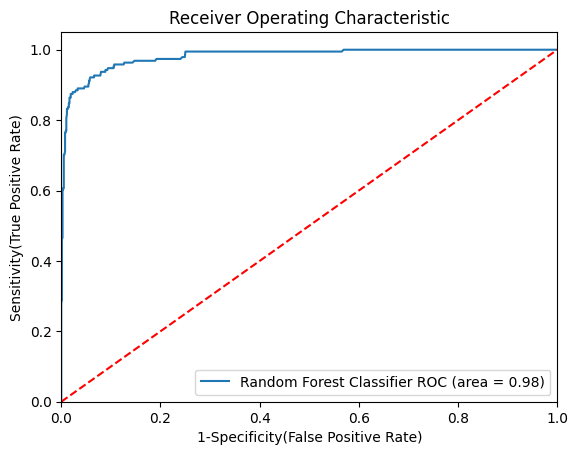

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure()

auc_models = [
    {
        "label": "Random Forest Classifier",
        "model": RandomForestClassifier(
            n_estimators=1000,
            min_samples_split=2,
            max_features=7,
            max_depth=None,
            random_state=42
        )
    }
]

for algo in auc_models:
    model = algo["model"]

    model.fit(X_train_tr, y_train)   

    y_proba = model.predict_proba(X_test_tr)[:, 1]   

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{algo['label']} ROC (area = {auc:.2f})")

plt.plot([0, 1], [0, 1], "r--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Receiver Operating Characteristic")

plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
